# Training DreamBooth LoRA with Stable Diffusion XL on Trump Thumbs Up Images:

## Linking Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Installing & Login to Hugging Face


In [ ]:
!pip install huggingface-hub

In [ ]:
!git config --global credential.helper store


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


##Cloning Hugging Face/diffusers - [Repo](https://github.com/huggingface/diffusers)


In [ ]:
import os
import subprocess


subprocess.run(["git", "clone", "https://github.com/huggingface/diffusers"])
os.chdir("diffusers")
subprocess.run(["pip", "install", "-e", "."])


CompletedProcess(args=['pip', 'install', '-e', '.'], returncode=0)

## Installing Requirements - Dreambooth SDXL

In [ ]:
os.chdir("examples/dreambooth")

In [ ]:
!pip install -r requirements_sdxl.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

## Write Basic Configuration for Accelerate

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

##  Load and Display Images from Drive

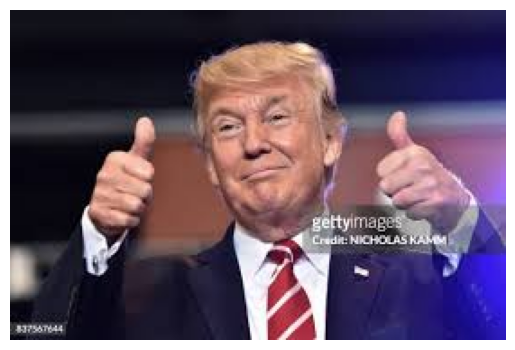

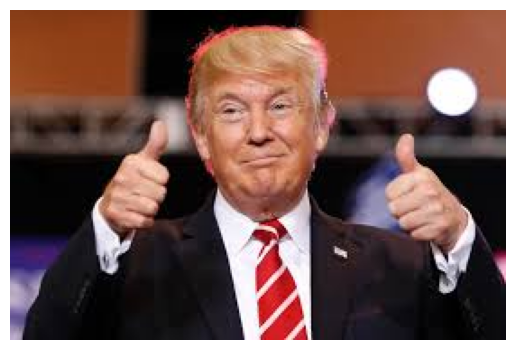

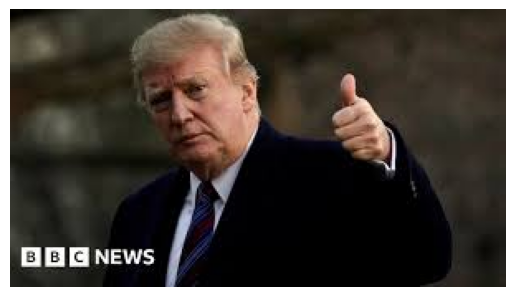

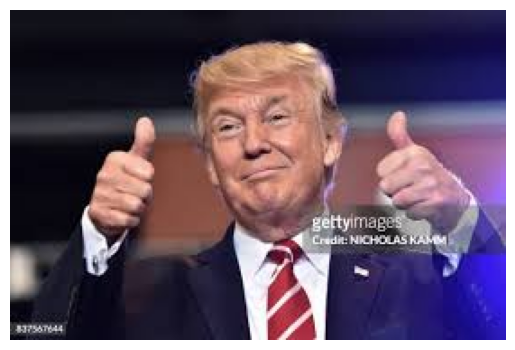

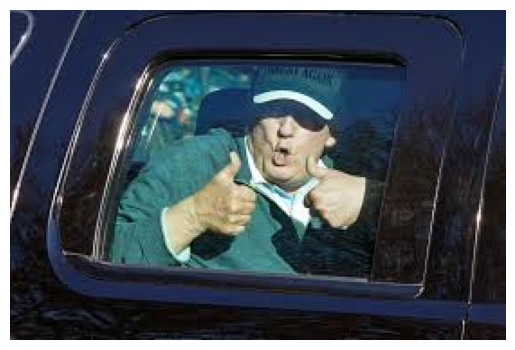

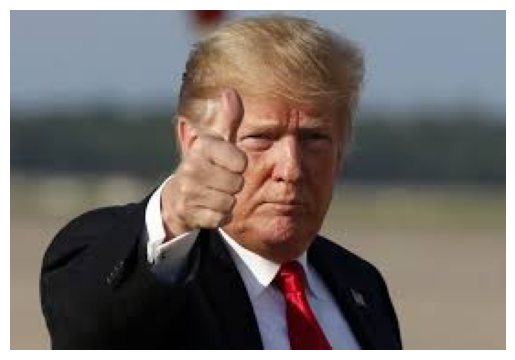

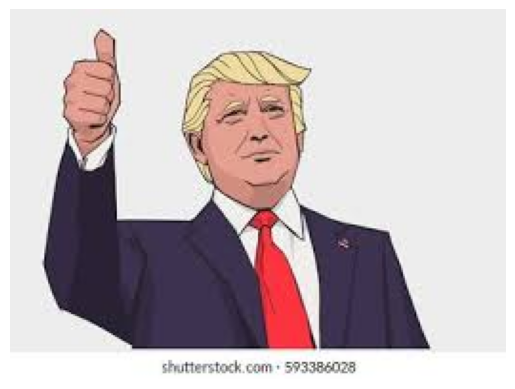

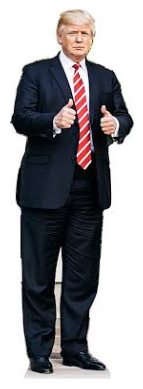

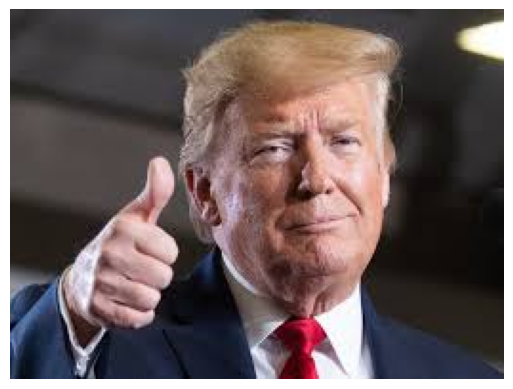

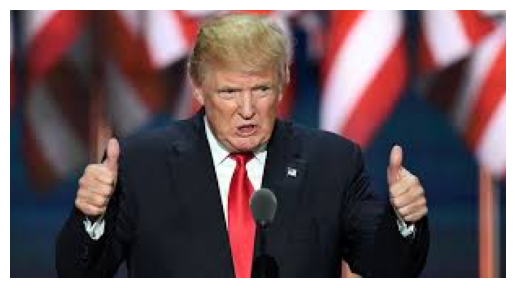

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

dir = '/content/drive/MyDrive/SDXL/Images/thumbsup'
count = 0
max_images = 10

for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)

    if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

        count += 1
        if count >= max_images:
            break


## Installing Required Libraries

In [ ]:
!pip install tensorrt bitsandbytes xformers wandb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 83.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for tensorrt: filename=tensorrt-10.0.1-py2.py3-none-any.whl size=16331 sha256=83db41a9a0ca6503af355a1e9cadf70d1f246bc26ae742725def05b2f74e9a8f
  Stored in directory: /root/.cache/pip/wheels/43/0e/35/f5de9a100ae769ece311b8f653e493f7e49bbcc25dcdc92e27
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.0.1-py2.py3-none-any.whl size=17551 sha256=4e3ca806594b0cfb85abdd78d1df08c12795615fa8eb3be4e61636446f4

In [ ]:
pip install --upgrade diffusers accelerate

## Logging into Weights and Biases

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Train DreamBooth LoRA Model with Stable Diffusion XL

In [ ]:
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --instance_data_dir="/content/drive/MyDrive/SDXL/Images/thumbsup" \
  --pretrained_vae_model_name_or_path="stabilityai/sdxl-vae" \
  --output_dir="/content/drive/MyDrive/SDXL/Output-Complex" \
  --mixed_precision="fp16" \
  --instance_prompt="a high-quality photo of Trump showing thumbs up" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 \
  --learning_rate=2e-4 \
  --lr_scheduler="constant_with_warmup" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --validation_prompt="A high-quality photo of Trump showing thumbs up in a taco restaurant, detailed, sharp focus" \
  --validation_epochs=15 \
  --seed="42" \
  --push_to_hub \
  --gradient_checkpointing \
  --checkpointing_steps=100 \
  --use_8bit_adam \
  --prior_loss_weight=0.8 \
  --num_class_images=10 \
  --report_to="wandb"

2024-05-26 23:15:16.005566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 23:15:16.005615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 23:15:16.012753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-26 23:15:16.033650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 23:15:18.206067: W tensorflow/comp

In [ ]:
%cd ..

/content


In [ ]:
!pip uninstall diffusers
!pip install -e ./diffusers

Found existing installation: diffusers 0.28.0.dev0
Uninstalling diffusers-0.28.0.dev0:
  Would remove:
    /usr/local/bin/diffusers-cli
    /usr/local/lib/python3.10/dist-packages/__editable__.diffusers-0.28.0.dev0.pth
    /usr/local/lib/python3.10/dist-packages/diffusers-0.28.0.dev0.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled diffusers-0.28.0.dev0
Y
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-0.editable-py3-none-any.whl size=11103 sha256=90d99a470e204fe901a1e004cded30891a672cf4560a0e19c5c72ced78b9931a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hxsjadew/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


## Load LoRA Weights and Generate Images


In [ ]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")
pipeline.load_lora_weights("/content/diffusers/examples/dreambooth/pytorch_lora_weights.safetensors")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
image = pipeline("A high quality picture of Trump showing the thumbs up in Paris", num_inference_steps=50).images[0]

image_path = "/content/drive/MyDrive/SDXL/Output-Complex/Trump1.png"
image.save(image_path)

print("Image saved at:", image_path)

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: /content/drive/MyDrive/SDXL/Output-Complex/Trump1.png


In [ ]:
image = pipeline("A picture of Trump showing the thumbs up as a Anime character, detailed, sharp focus", num_inference_steps=50).images[0]

image_path = "/content/drive/MyDrive/SDXL/Output-Complex/Trump2.png"
image.save(image_path)

print("Image saved at:", image_path)

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: /content/drive/MyDrive/SDXL/Output-Complex/Trump2.png


In [ ]:
image = pipeline("A picture of Trump showing thumbsup in whitehouse", num_inference_steps=50).images[0]

image_path = "/content/drive/MyDrive/SDXL/Output-Complex/Trump3.png"
image.save(image_path)

print("Image saved at:", image_path)

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: /content/drive/MyDrive/SDXL/Output-Complex/Trump3.png


In [ ]:
image = pipeline("A high quality picture of Trump showing the thumbs up as The Statue of Liberty", num_inference_steps=50).images[0]

image_path = "/content/drive/MyDrive/SDXL/Output-Complex/Trump4.png"
image.save(image_path)

print("Image saved at:", image_path)

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: /content/drive/MyDrive/SDXL/Output-Complex/Trump4.png


In [ ]:
image = pipeline("A high quality picture of Trump showing thumbs up in a lake with a laptop", num_inference_steps=50).images[0]

image_path = "/content/drive/MyDrive/SDXL/Output-Complex/Trump5.png"
image.save(image_path)

print("Image saved at:", image_path)

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: /content/drive/MyDrive/SDXL/Output-Complex/Trump5.png


## Push to Hugging Face Hub

In [ ]:
from huggingface_hub import HfApi

api = HfApi()

username = "Paresh1879"
repo_name = "stable-diffusion-xl-thumbsup-extend"

api.upload_folder(repo_id=f"{username}/{repo_name}", folder_path="/content/drive/MyDrive/SDXL")

0x0.jpg:   0%|          | 0.00/1.69M [00:00<?, ?B/s]

671-Free-Clipart-Of-Donald-Trump-Giving-Two-Thumbs-Up.jpg:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

AP20253421415739.jpg:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

Trump-Anime.png:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

Upload 61 LFS files:   0%|          | 0/61 [00:00<?, ?it/s]

GettyImages-578546944.jpg:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

Trump-NewYork.png:   0%|          | 0.00/1.77M [00:00<?, ?B/s]

Trump-StatueofLiberty.png:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Trump-Whitehouse.png:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

Trump3.png:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

random_states_0.pkl:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

scheduler.bin:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Paresh1879/stable-diffusion-xl-thumbsup-extend/commit/cd7fb9013310767cc3a6ffebc4647564cf305b4d', commit_message='Upload folder using huggingface_hub', commit_description='', oid='cd7fb9013310767cc3a6ffebc4647564cf305b4d', pr_url=None, pr_revision=None, pr_num=None)